<img src="pics/laliga.jpg">

# Laliga
<p><font size='4', style="font-family:Times new Roman"> The Campeonato Nacional de Liga de Primera División, commonly known simply as Primera División in Spain, and as La Liga in English-speaking countries and officially as LaLiga Santander for sponsorship reasons, stylized as LaLiga, is the men's top professional football division of the Spanish football league system
     </font></p>

<b><font size="4"> Laliga Dataset </font></b>
<p><font size='3'>  This dataset contains results from every La Liga match from 1995-1996 to 2020-2021</font> </p>


<font size="4"> Data set Columns </font>

<ul>
    <li><b>Season:</b>  part of the year during which matches were held..</li>
    <li><b>Date:</b> Exact Date on which match was played.</li>
    <li><b>HomeTeam</b>  Team with home field.</li>
    <li><b>AwayTeam:</b>  Visiting Team.</li>
    <li><b>FTHG:</b>  Goals scored by Home Team till half time.</li>
    <li><b>FTAG:</b>  Goals scored by Away Team till half time.</li>
    <li><b>FTR:</b>  Full Time Results.</li>
    <li><b>HTHG:</b> Goals scored by Home Team till half time.</li>
    <li><b>HTAG:</b> Goals scored by Away Team till half time.</li>
    <li><b>HTR:</b>  Half Time results.</li>
</ul>


Dataset link : https://www.kaggle.com/kishan305/la-liga-results-19952020

<p><i><font size='4'> In this notebook, we will take a look at the above dataset and we will draw different insights about different seasons and team
    </font>
    </i></p>

In [31]:
# importing the necessary libraries used throughout the project, Pandas, Numpy, Matplotlib, Seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# seaborn used only once throughout
import seaborn as sns 

In [32]:
# setting figure size, 
plt.rcParams['figure.figsize'] = [18, 5]
pd.options.mode.chained_assignment = None  # default='warn' #mute warnings

<font size='4' > Loading the Dataset </font>

In [33]:
laliga = pd.read_csv('dataset/laliga.csv')

In [34]:
# let's see how the dataset looks like :)
laliga.head()

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,1995-96,2/9/1995,La Coruna,Valencia,3,0,H,2.0,0.0,H
1,1995-96,2/9/1995,Sp Gijon,Albacete,3,0,H,3.0,0.0,H
2,1995-96,3/9/1995,Ath Bilbao,Santander,4,0,H,2.0,0.0,H
3,1995-96,3/9/1995,Ath Madrid,Sociedad,4,1,H,1.0,1.0,D
4,1995-96,3/9/1995,Celta,Compostela,0,1,A,0.0,0.0,D


In [35]:
# summary of the dataset
laliga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10044 entries, 0 to 10043
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    10044 non-null  object 
 1   Date      10044 non-null  object 
 2   HomeTeam  10044 non-null  object 
 3   AwayTeam  10044 non-null  object 
 4   FTHG      10044 non-null  int64  
 5   FTAG      10044 non-null  int64  
 6   FTR       10044 non-null  object 
 7   HTHG      10042 non-null  float64
 8   HTAG      10042 non-null  float64
 9   HTR       10042 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 784.8+ KB


## 1)  Analysis of the 95-96 season
<font size='3'> Analysing one of the season (1995-1996 in this case) will give us an idea of how we can analyse all the other seasons or those which we are interested in. </font> 

<b>Analysis overview :  </b>
<ul>
    <li>How many teams competed in the seaoson</li>
    <li>Who won the league?</li>
    <li>Visualizatoin of home,away wins and draws for all the teams throughout the season</li>
    <li>Overall points at the end of the season (Visualization)</li>
    <li>No of goals scored by each team throughout the season(visualizaion)</li>
    <li>No of goals scored by each team throughout the season(visualizaion)</li>
    <li>Championship run between the top 3 teams (visualization) </li>
 </ul>


In [36]:
# seperating the DataFrame that contain the results from 1995-1996 season only
season_95 = laliga[laliga['Season'] == '1995-96']

### How many teams Competed in this season?

In [37]:
no_of_teams = season_95['HomeTeam'].unique().size
print(f"{no_of_teams} teams participated in Season 1995-1996")

22 teams participated in Season 1995-1996


### Who won the league?

In [38]:
# this dictionary will store the team's name and points e.g {'realmadrid':3, 'Barcelona':3...}
teams_points = {}

In [39]:
# execute this cell once only

# iterating over all the rows in the DataFrame 
for value,row in season_95.iterrows():
    home = row['HomeTeam'] # selecting home and away team from each row 
    away = row['AwayTeam'] 

# checking whether a team is home, away and adding 3 points if won, 1 if drew
    if row['FTR'] == 'H':
        if home in teams_points:
            teams_points[home] += 3
        else:
            teams_points[home] = 3
    elif row['FTR'] == 'A':
        if away in teams_points:
            teams_points[away] += 3
        else:
            teams_points[away] = 3
    else:
        if away in teams_points:
            teams_points[away] += 1
        else:
            teams_points[away] = 1
        
        if home in teams_points:
            teams_points[home] += 1
        else:
            teams_points[home] = 1

In [40]:
# function will return the key against the max value from the dictionary 
def get_max(record):
    """Recieve the dictionary and return key with max value"""
    val = list(record.values())
    keys = list(record.keys())
    return keys[val.index(max(val))]

### League Winner (1995-1996)

In [41]:
print(f'{get_max(teams_points)}  won the 1995-1996 league')

Ath Madrid  won the 1995-1996 league


<img src="pics/atletico.jpg" width="800" height="800">

### Analyzing the home, away wins and draws throughout the season for all teams

In [42]:
# selecting the home teams with match result "Home-win" and counting the wins for each team using groupby
home_wins_95 = season_95[season_95['FTR']=='H'].groupby('HomeTeam').agg({'FTR':'count'}) 

# similarly for away teams with away wins
away_wins_95 = season_95[season_95['FTR']=='A'].groupby('AwayTeam').agg({'FTR':'count'})

# df containing drawn matches for all the team
draw_95 = season_95[season_95['FTR']=='D'].groupby('AwayTeam').agg({'FTR':'count'})

In [43]:
# renaming the 'FTR' as 'Home wins' (will make things easy when the df combined)
home_wins_95.rename(columns={'FTR':'Home_wins'}, inplace=True)

# renaming the 'FTR' column as 'Away wins'
away_wins_95.rename(columns={'FTR':'Away_wins'}, inplace=True)

# renaming the 'FTR' as 'draws'
draw_95.rename(columns={'FTR':'draws'}, inplace=True)

In [44]:
# combining the home and away wins dataFrame back as one DataFrame 
home_away_combined_df = home_wins_95.merge(away_wins_95, left_index=True, right_index=True)

# combining the home_away draw DataFrame to complete all the resu
results_95 = home_away_combined_df.merge(draw_95, left_index=True, right_index=True)

results_95.index.names = ['Team']
results_95.sort_values(['Home_wins','Away_wins','draws'], ascending=False, inplace=True)

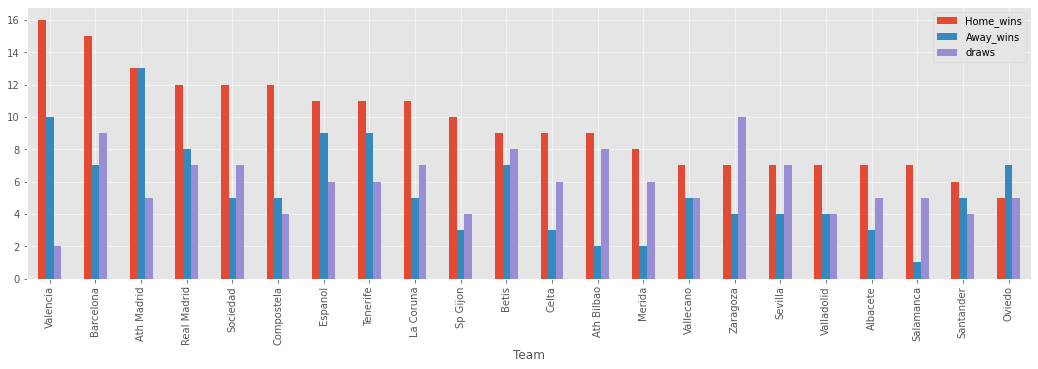

In [45]:
plt.style.use('ggplot')
results_95.plot(kind='bar')
plt.show()

### Teams' points at the end of seasons 

In [46]:
#converting the teams points to DataFrame
teams_points = pd.DataFrame(teams_points.items(),columns=["Team","Points"])

# sorting the DataFrame in descending
teams_points.sort_values('Points',ascending=False,inplace=True)

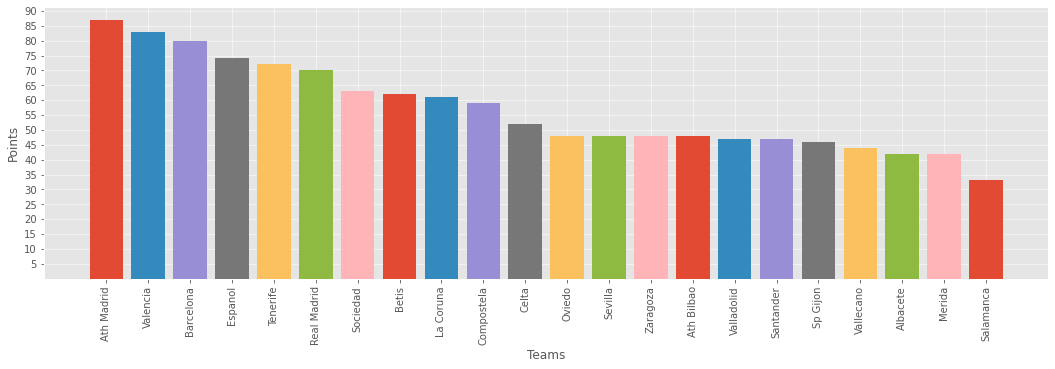

In [47]:
fig, ax = plt.subplots()
for index,row in teams_points.iterrows():
    ax.bar(row["Team"],row["Points"])

plt.xticks(rotation=90)
plt.yticks([x+5 for x in range(0,90,5)]) 
plt.xlabel("Teams")
plt.ylabel("Points")
plt.show()

### Goals scored  by each team during the league

In [48]:
# a dict for scoring key (team), value(goals_scored) record
goals_scored = {}

#iterating over the rows
for index, row in season_95.iterrows():
    # assigning home and away teams from each match(row) record
    home = row['HomeTeam']
    away = row['AwayTeam']
    
    # adding goals for each match(row) to home as well as away team
    goals_scored[home] = goals_scored.get(home,0) + row['FTHG']
    goals_scored[away] = goals_scored.get(away,0) + row['FTAG']

# sorting in ascending order by values 
goals_scored = {k:v for k,v in sorted(goals_scored.items(),key=lambda item:item[1])}
goals_scored = pd.DataFrame(goals_scored.items(), columns=['Team','Goals'])
points_and_goals = pd.merge(teams_points,goals_scored,on="Team")

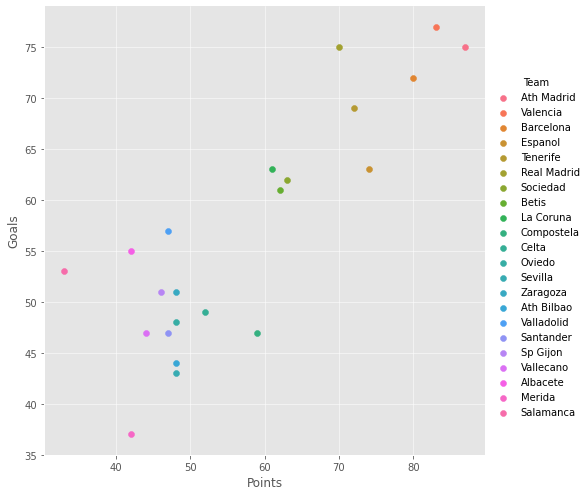

In [49]:
plt.style.use("ggplot")
sns.FacetGrid(points_and_goals,hue="Team",height=7).map(plt.scatter,"Points","Goals").add_legend()

### Championship run between the top 3 teams
<font size='3' > How Atletico Madrid, Valencia and Realmadrid competed throught the season </font>

In [50]:
# converting the Date column from Object to Date 
season_95['Date'] = pd.to_datetime(season_95['Date'])

#sorting values 
season_95.sort_values('Date', inplace=True)

In [51]:
# serperating the top 3 teams 
valencia = season_95[(season_95['HomeTeam']=='Valencia') | (season_95['AwayTeam']=='Valencia')]
athletico_madrid = season_95[(season_95['HomeTeam']=='Ath Madrid') | (season_95['AwayTeam']=='Ath Madrid')]
barcelona = season_95[(season_95['HomeTeam']=='Barcelona') | (season_95['AwayTeam']=='Barcelona')]

In [52]:
# to be executed only once
valencia.reset_index(inplace=True)
del valencia["index"]

athletico_madrid.reset_index(inplace=True)
del athletico_madrid["index"]

barcelona.reset_index(inplace=True)
del barcelona["index"]

In [53]:
#adding league score, represeting the full time score that will be made commulative latter on for title race after every match
valencia["league_score"] = 0
athletico_madrid["league_score"] = 0
barcelona["league_score"] = 0

In [54]:
# Adding scores in "league score column based on the match results"
for ind,row in valencia.iterrows():
    if (row["AwayTeam"] == "Valencia") & (row["FTR"] == "A") :
        valencia.loc[ind,"league_score"] = 3
    elif (row["HomeTeam"] == "Valencia") & (row["FTR"] == "H") :
        valencia.loc[ind,"league_score"] = 3
    elif row["FTR"] == "D":
        valencia.loc[ind,"league_score"] = 1
    else:
        valencia.loc[ind,"league_score"] =0

for ind,row in athletico_madrid.iterrows():
    if (row["AwayTeam"] == "Ath Madrid") & (row["FTR"] == "A") :
        athletico_madrid.loc[ind,"league_score"] = 3
    elif (row["HomeTeam"] == "Ath Madrid") & (row["FTR"] == "H") :
        athletico_madrid.loc[ind,"league_score"] = 3
    elif row["FTR"] == "D":
        athletico_madrid.loc[ind,"league_score"] = 1
    else:
        athletico_madrid.loc[ind,"league_score"] =0
        
for ind,row in barcelona.iterrows():
    if (row["AwayTeam"] == "Barcelona") & (row["FTR"] == "A") :
        barcelona.loc[ind,"league_score"] = 3
    elif (row["HomeTeam"] == "Barcelona") & (row["FTR"] == "H") :
        barcelona.loc[ind,"league_score"] = 3
    elif row["FTR"] == "D":
        barcelona.loc[ind,"league_score"] = 1
    else:
        barcelona.loc[ind,"league_score"] =0

In [55]:
# finding commulative sum for the league score column and reassigning
valencia["league_score"] = valencia["league_score"].cumsum()
athletico_madrid["league_score"] = athletico_madrid["league_score"].cumsum()
barcelona["league_score"] = barcelona["league_score"].cumsum()

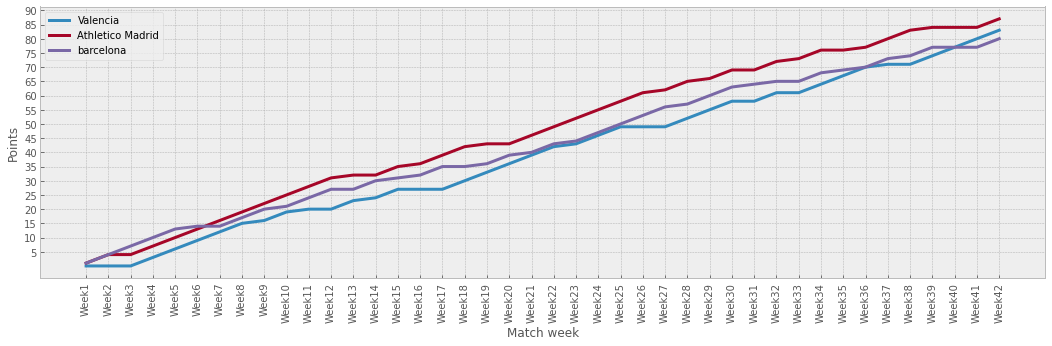

In [56]:
plt.style.use("bmh")
fig, ax = plt.subplots()
ax.plot(lis,valencia.league_score,label="Valencia",linewidth=3)
ax.set_label("Valencia")
x_tic = [f"Week{value+1}" for value in range(42)]
ax.plot(x_tic,athletico_madrid.league_score, label="Athletico Madrid",linewidth=3)
plt.xticks(rotation=90)
ax.set_label("Athletico madrid")
ax.plot(x_tic,barcelona.league_score,label="barcelona",linewidth=3)
ax.legend()
ax.set_xlabel("Match week")
ax.set_ylabel("Points")
plt.yticks([x+5 for x in range(0,90,5)])
plt.show()

# Teams with most laliga titles from 1995-2020

In [57]:
# this dictionary will contain all the 
seasons_dfs = {}

laliga_seasons = laliga['Season'].unique()

for season in laliga_seasons:
    seasons_dfs[season] = laliga[laliga['Season']==season]

In [1]:
def get_second_max(lis):
    return sorted(lis)[-2]


In [2]:
get_second_max([3,2,1,6,3])

3

In [58]:
# teams with laliga titles won
championships_won = {}
runner_ups = {}
# this loop will iterate over every dataframe (seaon)

for key in seasons_dfs:
    season_picked = seasons_dfs[key]
    
    # this dictionary will have the points of each team in the season
    teams_points = {}
    
    for value,row in season_picked.iterrows():
        home = row['HomeTeam']
        away = row['AwayTeam']
        
        if row['FTR'] == 'H':
            # following line of code add a key value with default value 0, and add 3 or if exist, only add 3
            teams_points[home] = teams_points.get(home,0)+3
        elif row['FTR'] == 'A':
            teams_points[away] = teams_points.get(away,0)+3 
        else:
            teams_points[away] = teams_points.get(away,0)+1
            teams_points[home] = teams_points.get(home,0)+1
    
    winning_team = get_max(teams_points)
    
    #this value will add by default 0 to the team
    championships_won[winning_team] = championships_won.get(winning_team,0) + 1

### Titles won from 1995 - 2020 visualization

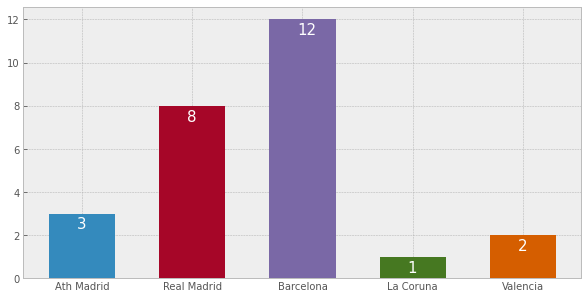

In [59]:
fig, ax = plt.subplots(figsize=(10,5))

for key in championships_won.keys():
    ax.bar(key, championships_won[key],width=0.6)

heights_total = sum([i.get_height() for i in ax.patches])

for i in ax.patches:
    ax.text(i.get_x()+.25, i.get_height()-0.7, \
            str(i.get_height()), fontsize=15,
                color='white')